In [1]:
#Importing necessary Libraries;
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (14,6)
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn import linear_model
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as  metrics
from IPython.display import display
from sklearn.cross_validation import train_test_split
#from sklearn.cross_validation import  cross_val_score
from sklearn.model_selection import  cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn import tree
from sklearn import naive_bayes
from sklearn.learning_curve import learning_curve
from sklearn import cross_validation
from sklearn.metrics import  make_scorer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
sns.set(style="darkgrid")
import os

Populating the interactive namespace from numpy and matplotlib


C:\Users\Krishna\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Krishna\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Krishna\Anaconda2\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarn

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

In [35]:
#User defined functions;
def confustion_matrix(y_test,y_predicted):
    confusionMatrix=confusion_matrix(y_test,y_predicted)
    Confu_matrix_df=pd.DataFrame(confusionMatrix)
    Confu_matrix_df.columns.name='PREDICTED'
    Confu_matrix_df.index.name='ACTUAL'
    Confu_matrix_df.name='CONFUSION MATRIX'
    print "CONFUSION MATRIX"
    print display(Confu_matrix_df)
    confusionmatrix=Confu_matrix_df
    print "Accuracy of the model is {:.10f}".format(metrics.accuracy_score(y_test,y_predicted))
    precision=(100*float(confusionmatrix.ix[1,1])/(confusionmatrix.ix[1,1]+confusionmatrix.ix[0,1]))
    recall=(100*float(confusionmatrix.ix[1,1])/(confusionmatrix.ix[1,1]+confusionmatrix.ix[1,0]))
    print "Precision of positive class('Default') is {:.10f}".format(precision)
    print "Recall of positive class('Default') is {:.10f}".format(recall)
    f_measure=((2)*precision*recall)/((recall)+(precision))
    print "The f-measure of the model is {:.10f}".format(f_measure)
    return Confu_matrix_df
def roc_curve(y_test,y_predicted_probability,pos_label=None):
    if pos_label==None:
        pos_label=1
    fpr,tpr,thresholds=metrics.roc_curve(y_test,y_predicted_probability,pos_label=pos_label )
    plt.plot(fpr,tpr)
    plt.xlabel("False Positive rate")
    plt.ylabel("True Positive rate")
    plt.title("ROC Curve")
    plt.xlim(0.0,1.0)
    plt.ylim(0.0,1.0)
    plt.grid(True)
    print "AUC of the model is {:.10f}".format(metrics.roc_auc_score(y_test,y_predicted_probability))
    plt.show()
    
#fpr,tpr,thresholds=roc_curve(y_test,y_predicted_probability,pos_label=1)
def score_func_custom(y_test,y_predicted):
    confusionMatrix=confusion_matrix(y_test,y_predicted)
    cm=confusionMatrix
    return float(cm[0][1]*10 + cm[1][0]*1)/(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
def my_scorer_function(y_test, y_predicted):
    confusionMatrix=confusion_matrix(y_test,y_predicted)
    Confu_matrix_df1=pd.DataFrame(confusionMatrix)
    Confu_matrix_df1.columns.name='PREDICTED'
    Confu_matrix_df1.index.name='ACTUAL'
    Confu_matrix_df1.name='CONFUSION MATRIX'
    cost=(1*Confu_matrix_df1.ix[1,0])+(10*Confu_matrix_df1.ix[0,1])
    return float(cost)/len(y_test)
def two_scorer():
    return make_scorer(my_scorer_function, greater_is_better=False)

In [4]:
#Creating required datasets
loans1 = pd.read_csv("mortgagereg.csv")
loans = loans1[[ 'orig_rt', 'orig_amt', 'ocltv', 'num_bo', 'dti', 'mi_pct', 'y_curr_rte', 'y_act_upb', 'y_rem_mths',
 'fico_300_645', 'fico_645_685', 'fico_685_730', 'fico_730_765', 'fico_765_790', 'fico_790_850', 'dti_00_21',
 'dti_21_27', 'dti_27_34', 'dti_34_41', 'dti_41_47', 'dti_47_100', 'OLTV_0_90', 'OLTV_90_95', 'OLTV_95_97', 'OLTV_97_103', 'OLTV_103_120', 'OLTV_120_150',
 'book_month_1', 'book_month_2', 'book_month_3', 'book_month_4', 'book_month_5', 'book_month_6','book_month_7','book_month_8','book_month_9','book_month_10','book_month_11','book_month_12',
'delta_Unemployment1', 'delta_Mortgage_rate1', 'delta_House_Price_Index__Level1', 'delta_Unemployment3',
 'delta_Mortgage_rate3', 'delta_House_Price_Index__Level3', 'delta_Unemployment6', 'delta_Mortgage_rate6', 'delta_House_Price_Index__Level6', 'delta_Unemployment9',
 'delta_Mortgage_rate9', 'delta_House_Price_Index__Level9', 'delta_Unemployment12', 'delta_Mortgage_rate12', 'delta_House_Price_Index__Level12',
 'delta_Unemployment15', 'delta_Mortgage_rate15', 'delta_House_Price_Index__Level15', 'delta_Unemployment18', 'delta_Mortgage_rate18',
 'delta_House_Price_Index__Level18', 'delta_Unemployment21', 'delta_Mortgage_rate21', 'delta_House_Price_Index__Level21', 'delta_Unemployment24', 'delta_Mortgage_rate24', 'delta_House_Price_Index__Level24']]

C:\Users\Krishna\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (31,35,36,37,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#creating loanspres and loanspresdef;
loanspres1 = loans1[loans1["nwdate"]!= "DEC2015"]

In [6]:
complete_df_X=loanspres1[[ 'orig_rt', 'orig_amt', 'ocltv', 'num_bo', 'dti', 'mi_pct', 'y_curr_rte', 'y_act_upb', 'y_rem_mths',
 'fico_300_645', 'fico_645_685', 'fico_685_730', 'fico_730_765', 'fico_765_790', 'fico_790_850', 'dti_00_21',
 'dti_21_27', 'dti_27_34', 'dti_34_41', 'dti_41_47', 'dti_47_100', 'OLTV_0_90', 'OLTV_90_95', 'OLTV_95_97', 'OLTV_97_103', 'OLTV_103_120', 'OLTV_120_150',
 'book_month_1', 'book_month_2', 'book_month_3', 'book_month_4', 'book_month_5', 'book_month_6','book_month_7','book_month_8','book_month_9','book_month_10','book_month_11','book_month_12',
'delta_Unemployment1', 'delta_Mortgage_rate1', 'delta_House_Price_Index__Level1', 'delta_Unemployment3',
 'delta_Mortgage_rate3', 'delta_House_Price_Index__Level3', 'delta_Unemployment6', 'delta_Mortgage_rate6', 'delta_House_Price_Index__Level6', 'delta_Unemployment9',
 'delta_Mortgage_rate9', 'delta_House_Price_Index__Level9', 'delta_Unemployment12', 'delta_Mortgage_rate12', 'delta_House_Price_Index__Level12',
 'delta_Unemployment15', 'delta_Mortgage_rate15', 'delta_House_Price_Index__Level15', 'delta_Unemployment18', 'delta_Mortgage_rate18',
 'delta_House_Price_Index__Level18', 'delta_Unemployment21', 'delta_Mortgage_rate21', 'delta_House_Price_Index__Level21', 'delta_Unemployment24', 'delta_Mortgage_rate24', 'delta_House_Price_Index__Level24']]

In [7]:
complete_df_y=loanspres1[[ 'default_flag']]

In [8]:
#Splitting into training and testing datasets;
X_train1f, X_test1f, y_train1f, y_test1f = train_test_split(complete_df_X, complete_df_y, test_size=0.25, random_state=42)

### Normalizing Data

In [9]:
X_train1f1 = (X_train1f-X_train1f.mean())/X_train1f.std()
#(X_train1f - X_train1f.mean()) / (X_train1f.max() - X_train1f.min())

In [13]:
X_train1f1.drop(['OLTV_103_120', 'OLTV_120_150'], axis=1, inplace=True)

In [15]:
X_test1f1 = (X_test1f-X_test1f.mean())/X_test1f.std()

In [17]:
X_test1f1.drop(['OLTV_103_120', 'OLTV_120_150'], axis=1, inplace=True)

### Random Forest

In [19]:
modelr = RandomForestRegressor(n_estimators = 100, oob_score =  True, random_state = 42)

In [20]:
modelr  =modelr.fit(X_train1f1,y_train1f)

C:\Users\Krishna\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [21]:
modelr.oob_score_

0.098607632958002678

In [23]:
#C-stat
y_oob = modelr.predict(X_test1f1)
roc_auc_score(y_test1f,y_oob)

0.79442709913453313

In [28]:
y_oob1 = np.where(y_oob>0.27,1,0)

In [38]:
confustion_matrix(y_test1f,y_oob1)

CONFUSION MATRIX


PREDICTED,0,1
ACTUAL,,
0,13405,904
1,942,430


None
Accuracy of the model is 0.8822779159
Precision of positive class('Default') is 32.2338830585
Recall of positive class('Default') is 31.3411078717
The f-measure of the model is 31.7812269032


PREDICTED,0,1
ACTUAL,,
0,13405,904
1,942,430


AUC of the model is 0.7944270991


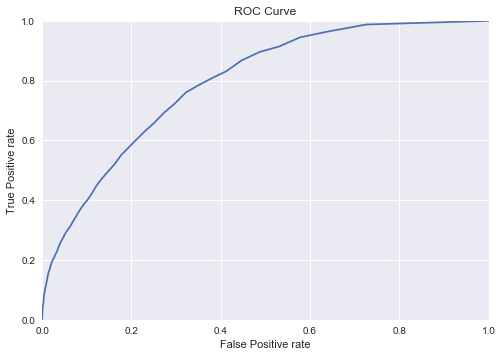

In [36]:
roc_curve(y_test1f,y_oob,pos_label=None)

### Neural Networks

In [39]:
modeln = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(66,33,10,1), max_iter =1000000,batch_size=2000)

In [40]:
%time modeln = modeln.fit(X_train1f1.as_matrix().astype(np.float), y_train1f.values.ravel())

Wall time: 16min 39s


In [41]:
y_predictN = modeln.predict(X_test1f1)

In [43]:
confustion_matrix(y_test1f,y_predictN)

CONFUSION MATRIX


PREDICTED,0,1
ACTUAL,,
0,13929,380
1,501,871


None
Accuracy of the model is 0.9438173586
Precision of positive class('Default') is 69.6243005596
Recall of positive class('Default') is 63.4839650146
The f-measure of the model is 66.4125047655


PREDICTED,0,1
ACTUAL,,
0,13929,380
1,501,871


AUC of the model is 0.7944270991


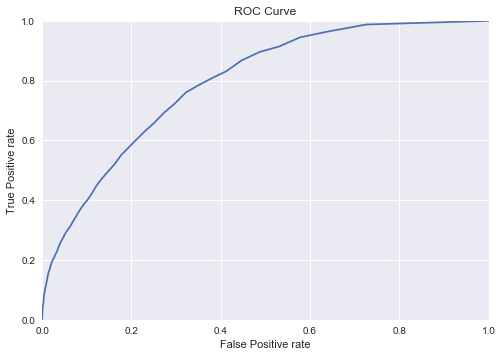

In [44]:
roc_curve(y_test1f,y_oob,pos_label=None)